In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
import torch
from torchvision.utils import save_image
from IPython.display import display, Image

In [2]:
pwd

'/atlas2/u/kechoi/bb_guidance'

# Noisy classifier, scale=3.0
- clamping only after l. 93

In [52]:
noisy_scale3 = np.load('noisy.npz')['x']
print(noisy_scale3.shape)
noisy_scale3 = torch.from_numpy(noisy_scale3).float()
noisy_scale3 = noisy_scale3.view(-1, 64, 3, 32, 32)

(16000, 3, 32, 32)


In [53]:
noisy_scale3.shape

torch.Size([250, 64, 3, 32, 32])

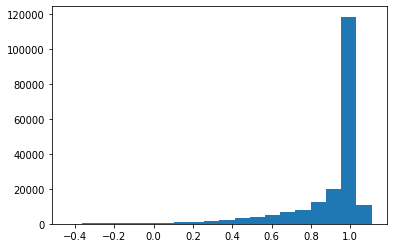

In [54]:
_ = plt.hist(noisy_scale3[30].numpy().reshape(-1), bins=20)

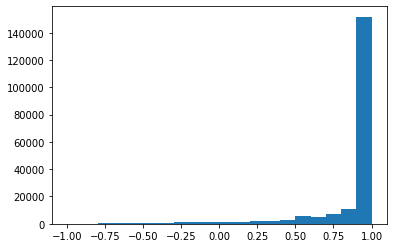

In [55]:
_ = plt.hist(noisy_scale3[-1].numpy().reshape(-1), bins=20)

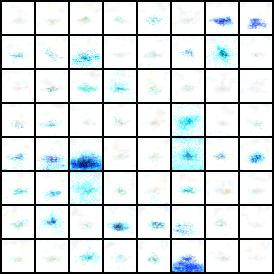

In [56]:
save_image(noisy_scale3[10], 'test.png')
display(Image('test.png'))

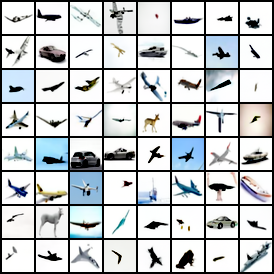

In [57]:
save_image(noisy_scale3[-1], 'test.png')
display(Image('test.png'))

# Pretrained classifier
- clamping at both spots

In [58]:
denoised_scale3 = np.load('denoised.npz')['x']
# denoised_scale3 = np.load('denoised_noclamp.npz')['x']
print(denoised_scale3.shape)
denoised_scale3 = torch.from_numpy(denoised_scale3).float()
denoised_scale3 = denoised_scale3.view(-1, 64, 3, 32, 32)

(16000, 3, 32, 32)


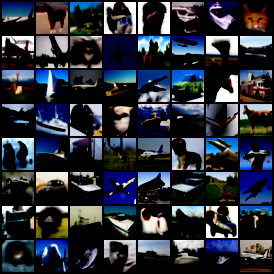

In [59]:
save_image(denoised_scale3[-1], 'test.png')
display(Image('test.png'))

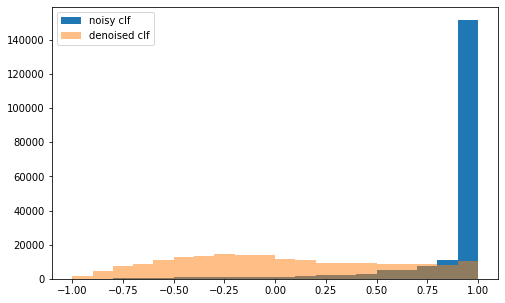

In [60]:
plt.figure(figsize=(8,5))
_ = plt.hist(noisy_scale3[-1].numpy().reshape(-1), bins=20, label='noisy clf')
_ = plt.hist(denoised_scale3[-1].numpy().reshape(-1), bins=20, label='denoised clf', alpha=0.5)
plt.legend()

# Grads?

In [62]:
denoised_scale3 = np.load('denoised.npz')['g']
print(denoised_scale3.shape)
denoised_scale3 = torch.from_numpy(denoised_scale3).float()
denoised_scale3 = denoised_scale3.view(-1, 64, 3, 32, 32)

(16000, 3, 32, 32)


In [64]:
noisy_scale3 = np.load('noisy.npz')['g']
print(noisy_scale3.shape)
noisy_scale3 = torch.from_numpy(noisy_scale3).float()
noisy_scale3 = noisy_scale3.view(-1, 64, 3, 32, 32)

(16000, 3, 32, 32)


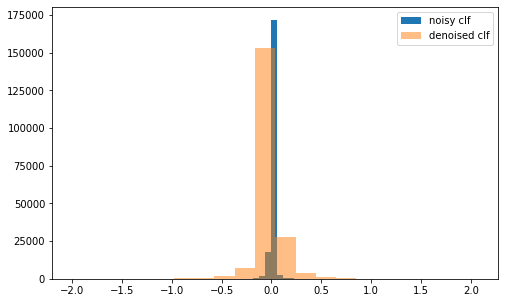

In [65]:
plt.figure(figsize=(8,5))
_ = plt.hist(noisy_scale3[-1].numpy().reshape(-1), bins=20, label='noisy clf')
_ = plt.hist(denoised_scale3[-1].numpy().reshape(-1), bins=20, label='denoised clf', alpha=0.5)
plt.legend()

In [70]:
for i in [0, 10, 20, 30, 40, 50, -1]:
    print('i', i)
    print(noisy_scale3[i].min(), noisy_scale3[i].max())
    print(denoised_scale3[i].min(), denoised_scale3[i].max())

i 0
tensor(-0.0022) tensor(0.0051)
tensor(-165.6250) tensor(74.8889)
i 10
tensor(-0.0051) tensor(0.0041)
tensor(-1.1917) tensor(0.6688)
i 20
tensor(-0.0068) tensor(0.0074)
tensor(-0.7159) tensor(0.5800)
i 30
tensor(-0.0094) tensor(0.0070)
tensor(-0.3554) tensor(0.4521)
i 40
tensor(-0.0111) tensor(0.0097)
tensor(-0.4942) tensor(0.3561)
i 50
tensor(-0.0124) tensor(0.0122)
tensor(-0.3803) tensor(0.4175)
i -1
tensor(-0.5334) tensor(0.6401)
tensor(-1.9990) tensor(2.0748)
